#**Linear Algebra (CpE210A)**

**Laboratory 2 : Plotting Vectors using NumPy and MatPlotLib**<br>
Coded and submitted by:<br>
Rodriguez, Mary Adrienne V. <br>
58011<br>

<br>

**Lab Exercises:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

#**Part 1: Skyline Eagle Fly**<br>
You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative displacement of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below:
Consider the computational algorithm:

Let the eagle's longitudinal and latitudinal be  long  and  lat  respectively.
Let the eagle's total distance as  disttotal , displacement be  disp , and  θ  as the direction of the vector.


In [ ]:
'''
GRADED FUNCTION 1 (30 points)

Create a void function that prints that shows the output below. Fill in necessary codes to make fix the functions. 
Replace the 'None' types with the appropriate codes, you may add your lines if you want to improve or customize your code.

Hint: there are two ways to find the magnitude of a displacement. One way is to manually solve using the 
Pythagorean formula, you can try to look into using the np.sqrt() function. Another way is to use the
Euclidean norm or L2 norm using the np.linalg.norm() function. Please explain the new functions that you implemented.

'''
## START OF FUNCTION
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) 
    lat = np.random.randint(-10,10, size=3)                            

    dist1 = (-3.84604,-7.69207)
    dist2 = (4.03822,-6.05732)
    dist3 = (9.42884,-5.66542)

    dist_total = (6,9)             
    disp = 21.6679                       
    alpha = 10**-6
    theta = -63.6393                      
    theta = np.degrees(theta)                
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()

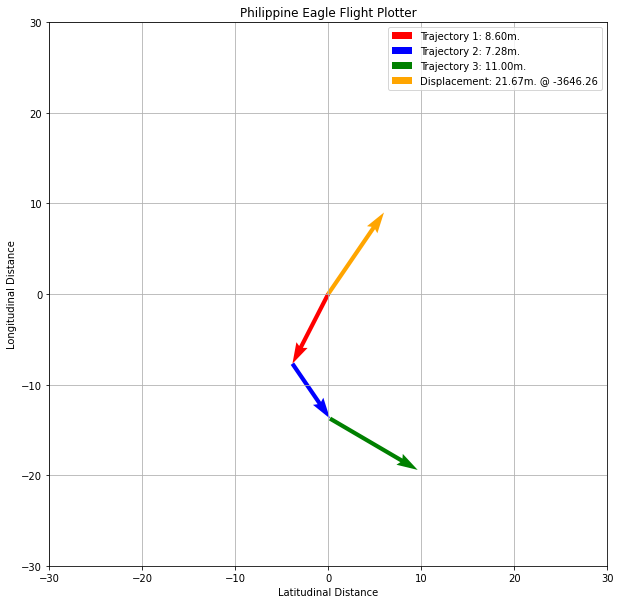

In [ ]:
track_eagle(make_figs=True)

#**Part 2: Reverse Engineering**<br>
Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below.

In [ ]:
'''
GRADED CELL 2 (20 points)
This code models a bad practice among software engineers. The code exhibits a lack of documentation, comments, and vague
variable declarations. Aside from explaining and deconstructing the code, make an appropriate documentation as a markdown,
proper comments for significant lines of code, and changing variable names into easily-understood naming.
'''
def eagle_kinematics(s, t):      ##define distance and time as array
    req_shape = 4              ##default array is set to 4
    v = np.zeros((req_shape-1,))  ##dimension of array reduced by one
    a = np.zeros((req_shape-2,))  ##dimension of array reduced by two
    t_vect = np.array([t**3, t**2, t, 1]) ## set array formula and multiplier t^3 for example
    if s.shape == (req_shape,):  
        v = np.array([3*s[0],2*s[1], s[2]]) ## create an array for velocity and multiply each array by 3 then 2 then 1
        a = np.array([2*v[0],v[1]]) ## create an array for for acceleration and multiply each array by 2 and 1
        s_t = np.sum(np.multiply(s, t_vect)) ## formula for s_t
        v_t = np.sum(np.multiply(v, t_vect[1:])) ## formula for v_t
        a_t = np.sum(np.multiply(a, t_vect[2:])) ## formula for a_t
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)') ## error handler if cannot be done
    
    return s_t, v_t , a_t #show vector output

In [ ]:
x = np.array([2,1,3,2]) ## related to req_shape number of array should be the same
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

#**Part 3: Bebang's Online Business**<br>
You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

In [ ]:
'''
GRADED FUNCTION 3 (50 points)
This is the starter code that you would use for Bebang's project. You may use Part 1 as a reference to complete this code.
Please provide proper documentation, commenting, and necessary revisions to make the code clean and understandable.
'''
## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))        
        week2 = np.array((reach[1], profit[1])) 
        week3 = np.array((reach[2], profit[2]))  
        week4 = np.array((reach[3], profit[3])) 
        
        week_total = 30009.9
        week_performance = 30912.8 
        alpha = 10**-6
        reach_gradient = -13.8817
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1],
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        ## put necessary vector plotting code here

        plt.quiver(0,0, week1l[0], week1l[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))
        plt.quiver(week_total[0],week_total[1], week_total[1], week_total[2], 
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.005,
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))


        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Dimension error') ## Make a more appropriate error statement. 

## END OF FUNCTION

In [ ]:
profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([100, 100, 500, 10])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=True) ## Toggle 'make_figs' during debugging or making documentations

NameError: ignored